# 경사하강법 
### __RSS : Residual Sum of Square__ ( 회귀 )

$$ J = Cost(w) = RSS = {1 \over m}{\sum_{i=1}^m}{(Wx^{(i)} - y^{(i)})}^2 $$

### Gradient Descent Algorithm 

$ 1)\quad \hat y = wX $

$ 2)\quad 위의 식에서 W값을 기울기로 취급하고, 기존의 상수 {1 \over m}을 {1 \over 2m}으로 변경하여 미분을 쉽게 해준다 $

$ 3)\quad Cost(w) = RSS = {(wX - y)}{(wX - y)}^t $

$ 4)\quad W\;미분 진행 $

$ 5)\quad w := w - \eta{\partial \over \partial w}cost(w) = w - \eta{\partial \over \partial w}{(wX - y)}{(wX - y)}^t $

$ 6)\quad W := W - ( 2X^tXw - 2X^ty )  $


$ \alpha는\; 수정이\; 반복될\; 때,\; 다음 \; 점을\; 어느정도\; 옮길\; 지\; 결정하는\; 상수 $

$ 최소점\; 0에서\; 우측에\; 점이\; 위치한다면\; 기울기는\; 양수,\; 우측에\; 있다면\; 기울기는\; 음수가\; 된다.\;즉,\;0을\; 기준으로\; 우측에\; 있다면\; 작은\; 곳으로 움직이고,\; 좌측에\; 있다면\; 큰\; 쪽으로\; W를\; 이동시키기\; 위해,\; 음수를\; 곱하여\; 이동시킨다$

$$W := W - \eta{1 \over m}{\sum_{i=1}^m}{(Wx^{(i)} - y^{(i)})}x^{(i)} $$

$$  w := w - \eta( 2X^tXw - 2X^ty )  $$

$$ where \; \eta \; is\; the\; learning \; rate $$

######  경사하강법 
<img src = './img/05_경사하강법.jpg' width = '60%' height = '60%' >

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff)) # xi * (실제값 - 예측값 / diff)
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [34]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [35]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1) # r, c
y = 6 + 4 * X + np.random.randn(100,1)

w1, w0 = gradient_descent_steps(X, y, iters=1000)

print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


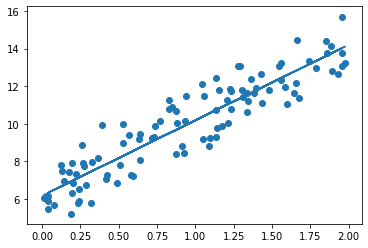

In [36]:
# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)
plt.plot(X,y_pred)